# Aykiri Gozlem Analizi 

## Aykiri Degerleri Yakalamak

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")


In [54]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [55]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

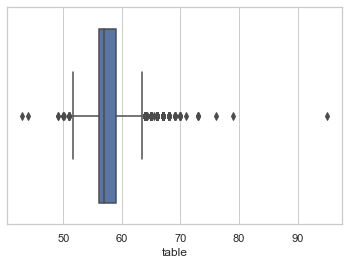

In [56]:
sns.boxplot(x=df_table);

In [10]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

# inter quartile
IQR = Q3 - Q1

In [18]:
print('Q1 =', Q1,'\nQ3 =', Q3,'\nIQR =', IQR)

Q1 = 56.0 
Q3 = 59.0 
IQR = 3.0


In [67]:
df_table.describe().T

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [60]:
df_table.describe()[[4,6]]

25%    56.0
75%    59.0
Name: table, dtype: float64

In [61]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print('Alt sinir=', alt_sinir,'\nUst sinir=', ust_sinir)

Alt sinir= 51.5 
Ust sinir= 63.5


In [62]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [63]:
# Aykiri True - False vektoru (alt sinir icin sadece)

aykiri_tf = (df_table < alt_sinir)

In [64]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [65]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [66]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Aykiri Deger Problemini Cozmek

## Silme

In [69]:
type(df_table)

pandas.core.series.Series

In [70]:
df_table = pd.DataFrame(df_table)
type(df_table)

pandas.core.frame.DataFrame

In [72]:
df_table.shape

(53940, 1)

In [76]:
# Temiz DataFrame

t_df = df_table[˜((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis =1)]

SyntaxError: invalid character in identifier (115297370.py, line 3)